In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [3]:
# reading df from github repo
df = pd.read_csv(url)

In [4]:
df.head()
df.drop(columns=['EmployeeID', 'EmployeeCount','Shift', 'StandardHours','Over18'], inplace=True)

In [5]:
df['Attrition'] = df['Attrition'].map({"Yes":1, "No":0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [6]:
# training set 
y = df['Attrition']
X = df.drop(columns=['Attrition']) 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Select Dtype columns that are non-string(ints,floats,..)
num_columns = X_train.select_dtypes(exclude=['object']).columns
num_columns = num_columns.tolist()
cor_columns = num_columns.copy()  # Create a copy
cor_columns.append('Attrition')  

# Select string-type columns 
str_columns = [col for col in df.columns if col not in num_columns]

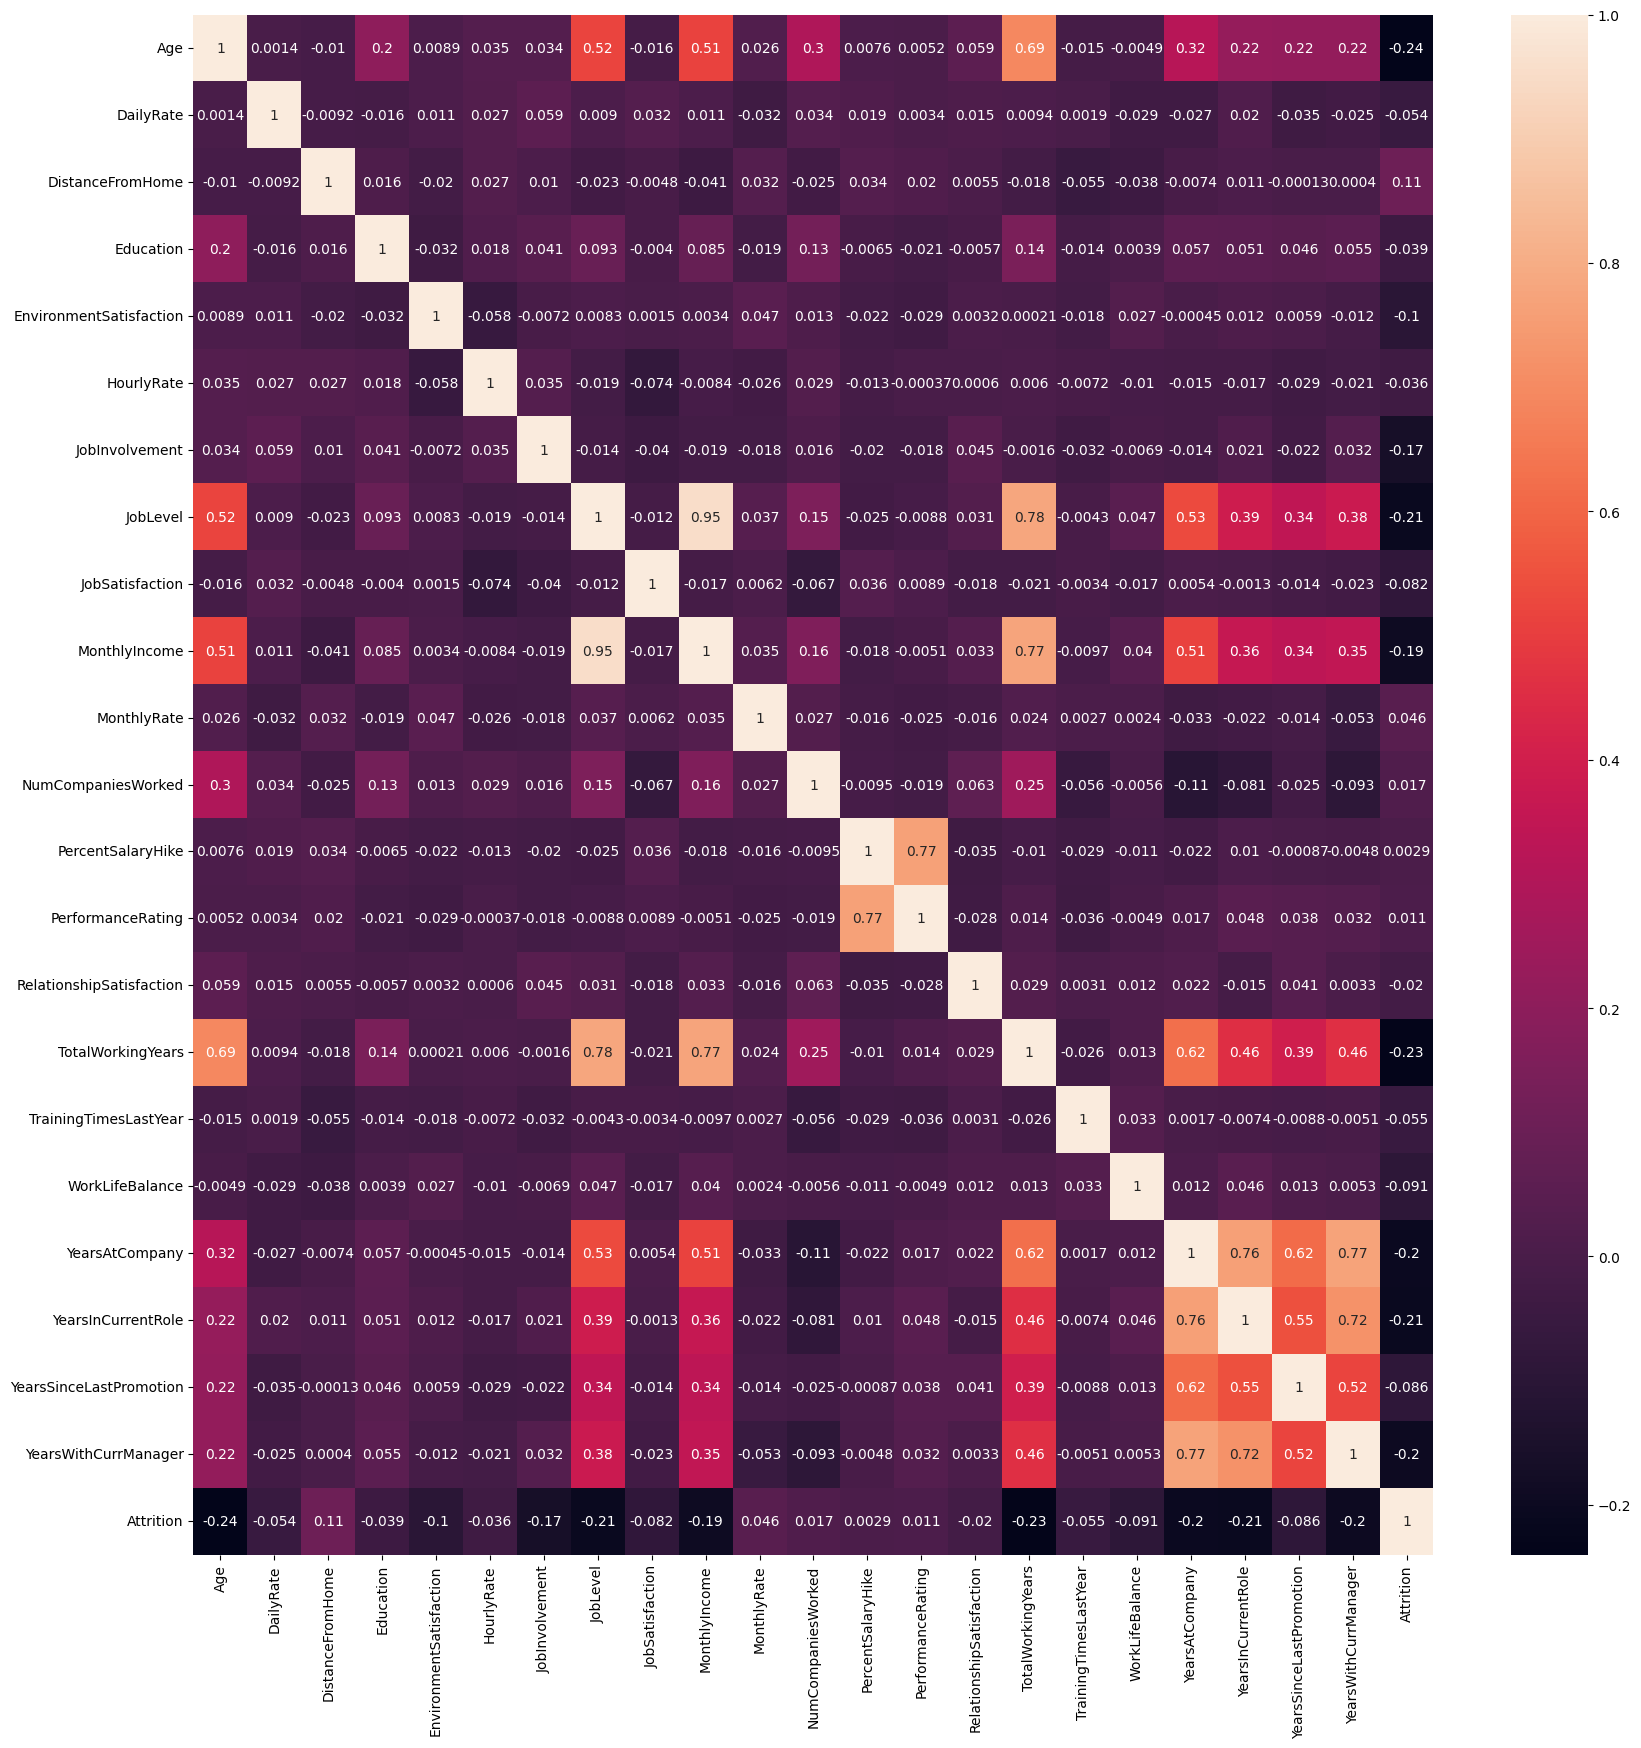

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.001441,-0.010079,0.204655,0.008945,0.034671,0.034193,0.518333,-0.015848,0.511378,...,0.005246,0.058528,0.692512,-0.015408,-0.004878,0.319012,0.222655,0.217212,0.215909,-0.239984
DailyRate,0.001441,1.000000,-0.009227,-0.015881,0.010620,0.027128,0.058864,0.009005,0.032115,0.011030,...,0.003353,0.014539,0.009378,0.001901,-0.028549,-0.026892,0.019651,-0.034571,-0.025272,-0.053892
DistanceFromHome,-0.010079,-0.009227,1.000000,0.015937,-0.019730,0.026947,0.010281,-0.023455,-0.004758,-0.041201,...,0.020482,0.005482,-0.017663,-0.055471,-0.037821,-0.007420,0.011448,-0.000126,0.000403,0.105580
Education,0.204655,-0.015881,0.015937,1.000000,-0.031925,0.017996,0.041046,0.093227,-0.003957,0.085116,...,-0.020664,-0.005750,0.143324,-0.014070,0.003933,0.057461,0.051029,0.045785,0.055096,-0.038843
EnvironmentSatisfaction,0.008945,0.010620,-0.019730,-0.031925,1.000000,-0.057505,-0.007220,0.008277,0.001518,0.003372,...,-0.029104,0.003221,0.000208,-0.017722,0.027262,-0.000448,0.012241,0.005866,-0.012417,-0.101278
HourlyRate,0.034671,0.027128,0.026947,0.017996,-0.057505,1.000000,0.034741,-0.018830,-0.073942,-0.008443,...,-0.000370,0.000601,0.005988,-0.007194,-0.009956,-0.014742,-0.016776,-0.028642,-0.021436,-0.036300
JobInvolvement,0.034193,0.058864,0.010281,0.041046,-0.007220,0.034741,1.000000,-0.013660,-0.039738,-0.019240,...,-0.017970,0.045107,-0.001576,-0.031580,-0.006931,-0.013652,0.020541,-0.022153,0.031574,-0.166036
JobLevel,0.518333,0.009005,-0.023455,0.093227,0.008277,-0.018830,-0.013660,1.000000,-0.012497,0.951572,...,-0.008759,0.030606,0.780929,-0.004251,0.047481,0.532529,0.387624,0.343102,0.379717,-0.207634
JobSatisfaction,-0.015848,0.032115,-0.004758,-0.003957,0.001518,-0.073942,-0.039738,-0.012497,1.000000,-0.016550,...,0.008859,-0.018232,-0.021435,-0.003440,-0.017280,0.005376,-0.001337,-0.013595,-0.023042,-0.081881
MonthlyIncome,0.511378,0.011030,-0.041201,0.085116,0.003372,-0.008443,-0.019240,0.951572,-0.016550,1.000000,...,-0.005113,0.033035,0.772938,-0.009690,0.039910,0.513977,0.364152,0.337241,0.350122,-0.193527


In [23]:
# Let's check correlation between numerical columns 
cor = df[cor_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True)
plt.show()
cor

In [24]:
# Get first 5 most correlated features 
cor['Attrition'].sort_values(ascending=True)[:5]

Age                  -0.239984
TotalWorkingYears    -0.234182
YearsInCurrentRole   -0.207891
JobLevel             -0.207634
YearsAtCompany       -0.201373
Name: Attrition, dtype: float64

In [26]:
# Let's check point biserial correlation between numerical v.s target
# Store p_values for each pair 
pv_dict = {}
alpha = 0.05

for col in num_columns:
    if stats.pointbiserialr(df[col], y).pvalue < alpha: 
        pv_dict[col] = stats.pointbiserialr(df[col], y).pvalue
    
sorted(pv_dict.items(), key=lambda x: x[1])[:5]

[('Age', 2.2059860465151512e-23),
 ('TotalWorkingYears', 2.591849133080902e-22),
 ('YearsInCurrentRole', 8.070296619431751e-18),
 ('JobLevel', 8.870805904375037e-18),
 ('YearsAtCompany', 8.559210839950406e-17)]

### We seem to get consistent result from correlation and biserial correlation against Attrition

- So Age, TotalWorkignYears, YearsInCurrentRole, JobLevel, and YearsAtCompany seem to be potential counfounding factors.
- Now, let's encode the categorical features and check for significant features; Remember that correlation can only be calculated for continuous/numerical features. That's why we did these tests on numerical features first. 

In [27]:
# Columns that were not numerical
df[str_columns]

# Let's check how many categories these non-numerical features have
for col in str_columns:
    print(f"{col} | number of types: {len(df[col].unique())}")
    print(df[col].unique(), "\n")

# We want to check which of these are ordinal or nominal
# if ordinal, mapping to values workds
# if nominal, one-hot encoding

Attrition | number of types: 2
[0 1] 

BusinessTravel | number of types: 3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department | number of types: 3
['Cardiology' 'Maternity' 'Neurology'] 

EducationField | number of types: 6
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender | number of types: 2
['Female' 'Male'] 

JobRole | number of types: 5
['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin'] 

MaritalStatus | number of types: 3
['Single' 'Married' 'Divorced'] 

OverTime | number of types: 2
['Yes' 'No'] 



## now we can check the types of our features
Binary variables: Gender, Overtime 

Ordinal: BusinessTravel

Nominal: Department, EducationField, JobRole, MartialStatus

In [28]:
# first map binary and ordinal features to numerical 
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})
df['BusinessTravel'] = df['BusinessTravel'].map(
    {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

# Confirm we converted these variables
df[['Gender','OverTime','BusinessTravel']].head()

,Gender,OverTime,BusinessTravel
0,1,1,1
1,0,0,2
2,0,1,1
3,1,1,2
4,0,0,1


In [29]:
from sklearn import preprocessing as p

In [30]:
df[str_columns].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,1,Cardiology,Life Sciences,1,Nurse,Single,1
1,0,2,Maternity,Life Sciences,0,Other,Married,0
2,1,1,Maternity,Other,0,Nurse,Single,1
3,0,2,Maternity,Life Sciences,1,Other,Married,1
4,0,1,Maternity,Medical,0,Nurse,Married,0


In [31]:
# We only want to hot-encode nominal variables 
cols_nom = ['Department','EducationField','JobRole','MaritalStatus']

nom_df = df[cols_nom]

In [32]:
# Apply one-hot encoding to nominal variables
encoder = p.OneHotEncoder()

encoder.fit(nom_df)
onehotlables = encoder.transform(nom_df)

encoded_cols = pd.DataFrame(onehotlables.toarray(), columns=encoder.get_feature_names_out(), dtype=int)

In [33]:
encoded_cols.head()

,Department_Cardiology,Department_Maternity,Department_Neurology,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [34]:
# Now we merge the tables with the one-hot encoded features 
train_df = df
# Drop all string columns
train_df.drop(columns=cols_nom, inplace=True)
# Merge the encoded columns
train_df = train_df.join(encoded_cols)

In [35]:
print(df.shape)
print(train_df.shape)
train_df.head()



(1676, 26)
(1676, 43)


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,0,1,1102,1,2,2,1,94,3,...,0,0,0,0,1,0,0,0,0,1
1,49,0,2,279,8,1,3,0,61,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1,1373,2,2,4,0,92,2,...,1,0,0,0,1,0,0,0,0,1
3,33,0,2,1392,3,4,4,1,56,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,1,591,2,1,1,0,40,3,...,0,0,0,0,1,0,0,0,1,0


We can see that we have 17 more features due to the encoding. But now we can reapply correlation and even do some PCA. 

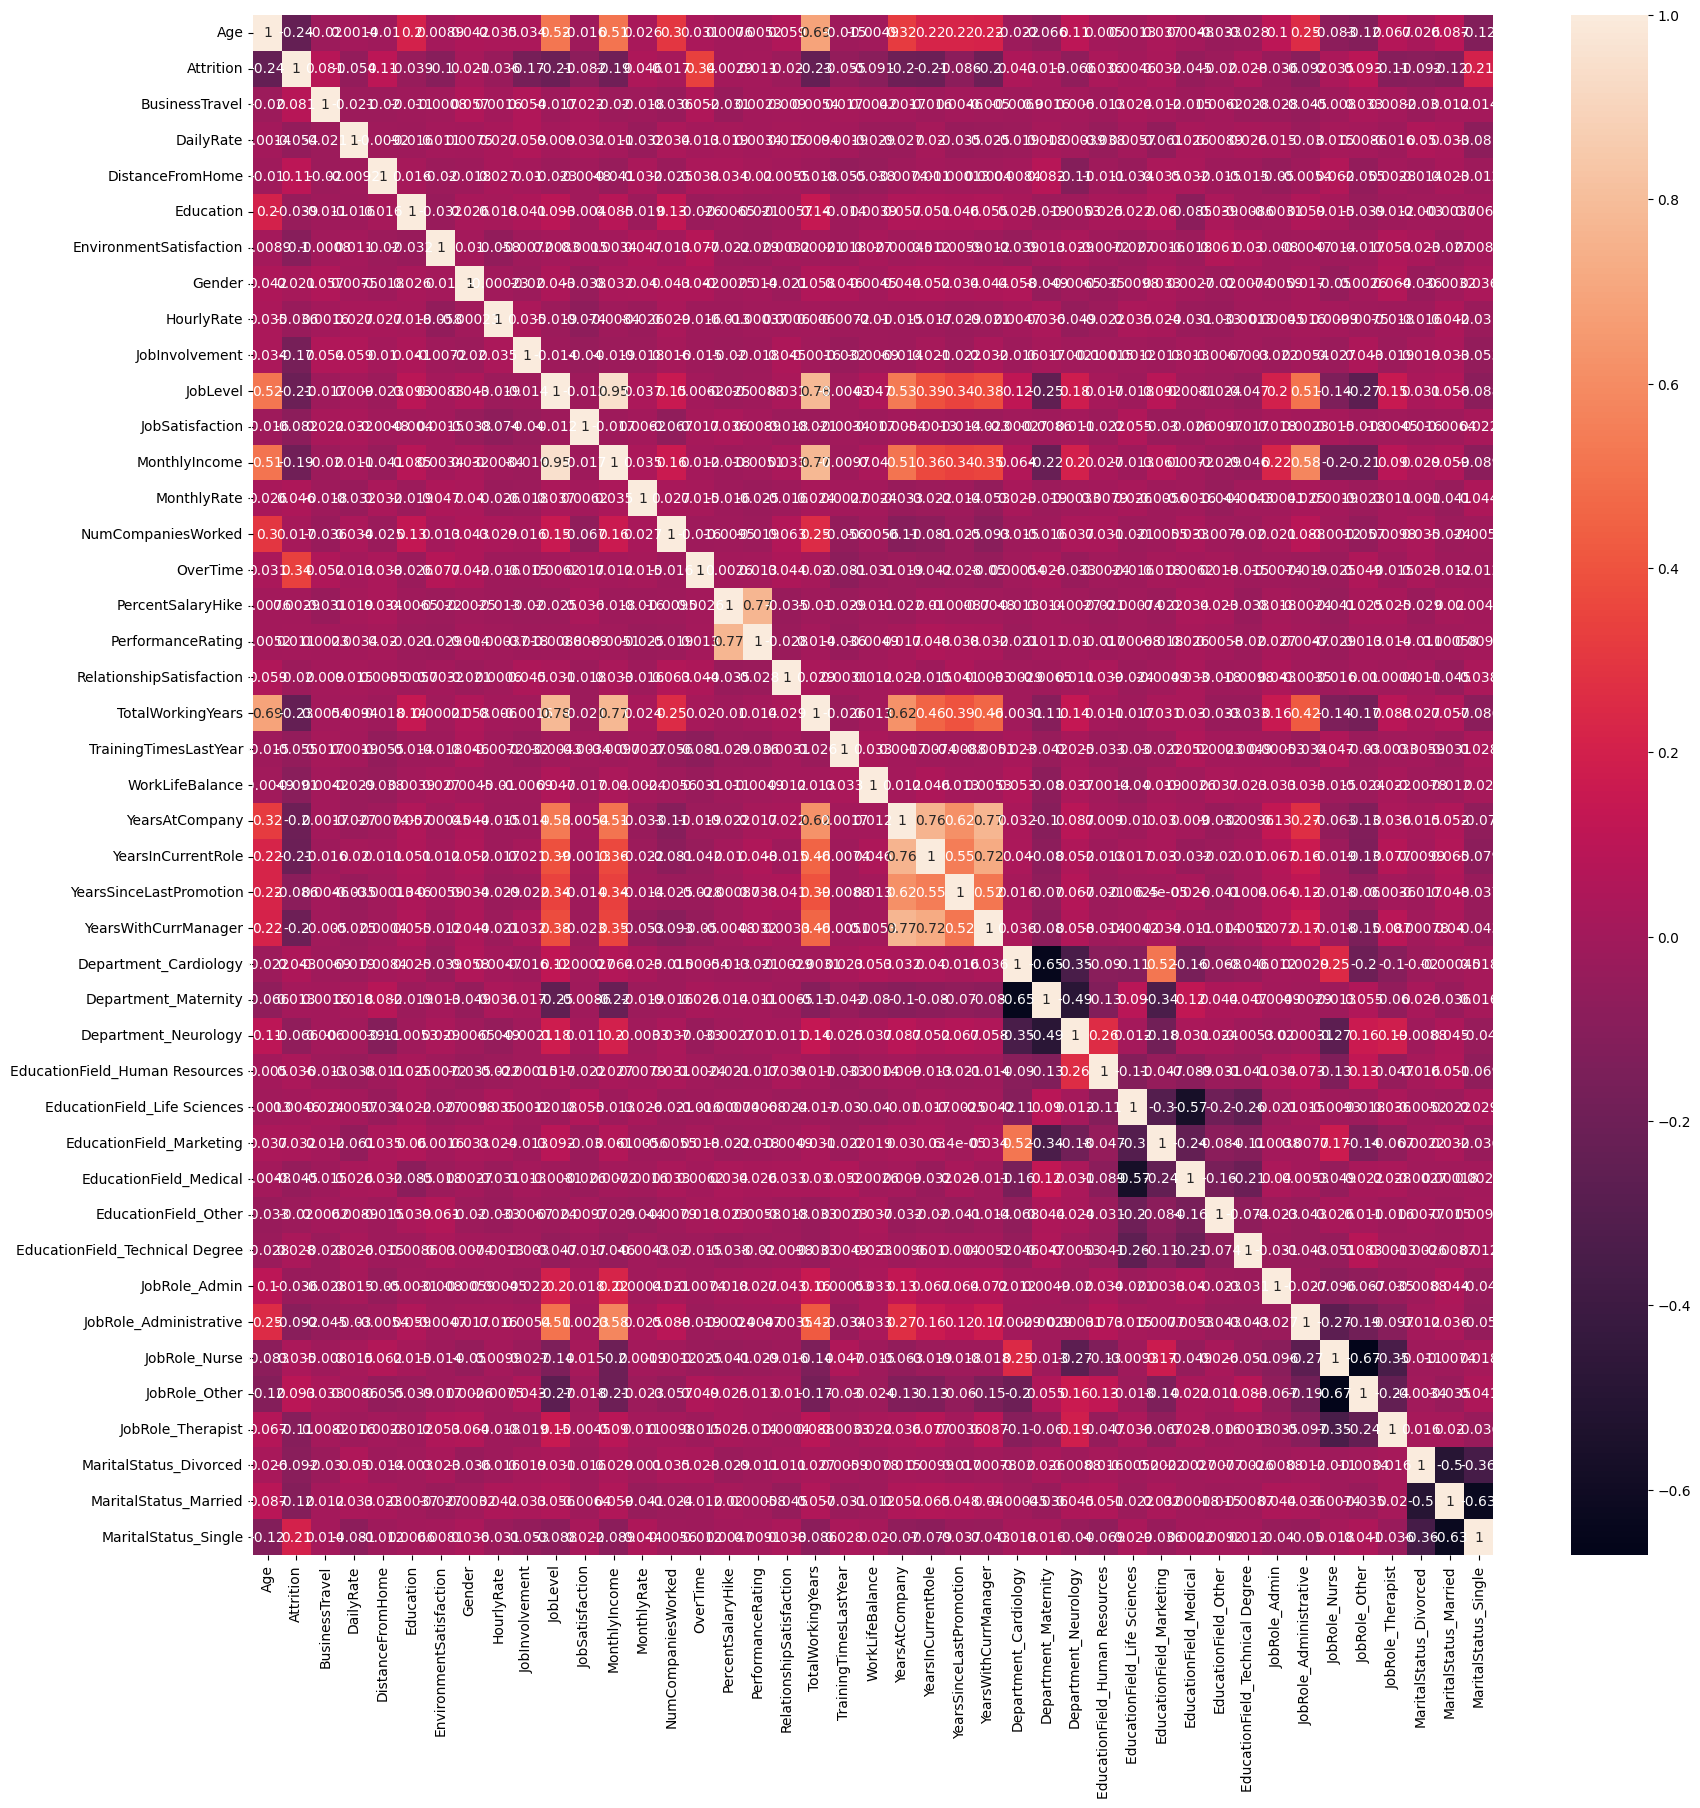

In [24]:
cor_total = train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_total, annot=True)
plt.show()

In [25]:
# Check the most significant features
print('Positive Correlation')
print(cor_total['Attrition'].sort_values(ascending=False)[:10])

Positive Correlation
Attrition                         1.000000
OverTime                          0.337383
MaritalStatus_Single              0.207201
DistanceFromHome                  0.105580
JobRole_Other                     0.093408
BusinessTravel                    0.080836
MonthlyRate                       0.045744
Department_Cardiology             0.043420
EducationField_Human Resources    0.036165
JobRole_Nurse                     0.034682
Name: Attrition, dtype: float64


In [26]:
print('Negative Correlation')
print(cor_total['Attrition'].sort_values(ascending=True)[:10])

Negative Correlation
Age                     -0.239984
TotalWorkingYears       -0.234182
YearsInCurrentRole      -0.207891
JobLevel                -0.207634
YearsAtCompany          -0.201373
YearsWithCurrManager    -0.201087
MonthlyIncome           -0.193527
JobInvolvement          -0.166036
MaritalStatus_Married   -0.115616
JobRole_Therapist       -0.107536
Name: Attrition, dtype: float64


In [27]:
from sklearn import decomposition as decomp

In [30]:
pca = decomp.PCA(n_components = len(cor_total.columns))
pca.fit(train_df)
X = pca.transform(train_df)

In [36]:
pca.explained_variance_ratio_

array([6.94212322e-01, 3.03586698e-01, 2.19214241e-03, 5.55280193e-06,
       1.01547415e-06, 9.00502525e-07, 6.24184133e-07, 1.81866688e-07,
       1.62145642e-07, 8.22836751e-08, 7.06150335e-08, 5.51486372e-08,
       4.78220199e-08, 2.25131990e-08, 1.65340607e-08, 1.63156083e-08,
       1.55903839e-08, 1.35263069e-08, 7.08450504e-09, 6.78448323e-09,
       6.33318098e-09, 5.11730259e-09, 4.86144047e-09, 4.76685729e-09,
       3.98977397e-09, 3.42787861e-09, 3.19109594e-09, 2.98803726e-09,
       2.72539925e-09, 1.93196880e-09, 1.81334074e-09, 1.20588516e-09,
       1.05320512e-09, 8.74763341e-10, 7.53424131e-10, 7.00828908e-10,
       6.42307495e-10, 2.39690066e-10, 1.45345858e-10, 4.73068490e-24,
       2.03282083e-26, 0.00000000e+00, 0.00000000e+00])

In [49]:
var_exp = []
cum_var = []
var = 0
# Lets check for about 5 PCs
for i in range(5):
    var_exp.append(pca.explained_variance_ratio_[i])
    var += pca.explained_variance_ratio_[i]
    cum_var.append(var)

Text(0, 0.5, 'Explained Variance ratio')

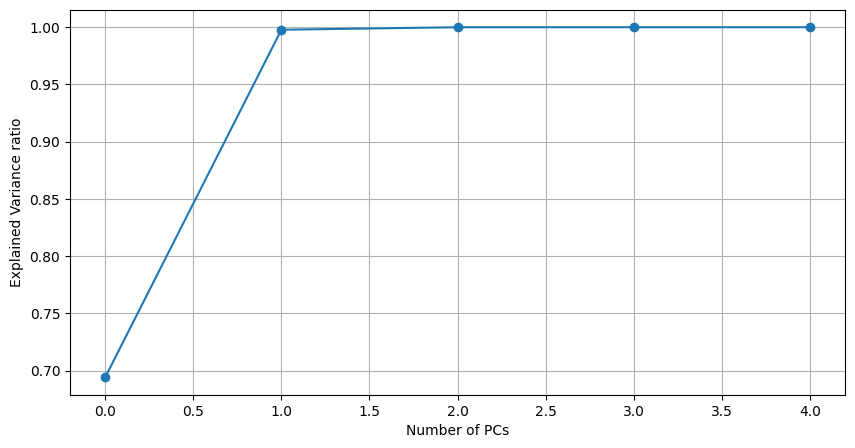

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(cum_var,marker='o')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance ratio')

We can see the 2PCs are able to explain nearly all the variance from the dataset.